In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv("thumb_dataset_60.csv")

In [4]:
data.head()

,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Palm_tip_x,Thumb_tip_x,...,Index_tip_y,Middle_tip_y,Ring_tip_y,Pinky_tip_y,Palm_tip_z,Thumb_tip_z,Index_tip_z,Middle_tip_z,Ring_tip_z,Pinky_tip_z
0,29,187,131,87,37,29,17,22,-14.660274,39.523682,...,-63.066730,-73.089493,-67.692467,-47.210987,142.743011,117.693123,128.960892,120.485191,119.897202,117.086632
1,28,180,143,84,38,30,19,21,-14.837674,39.315353,...,-63.710129,-73.698479,-68.266602,-47.752075,143.121521,118.084480,129.343414,120.853348,120.224327,117.420189
2,25,138,141,79,38,29,18,19,-15.210304,38.979317,...,-64.856079,-74.779861,-69.312157,-48.744205,144.155243,119.193871,130.340744,121.744759,121.021606,118.195000
3,27,145,148,95,32,27,18,19,-15.459749,38.781410,...,-65.447701,-75.353836,-69.878258,-49.307728,144.945755,120.071777,131.168594,122.499489,121.696678,118.856415
4,28,124,155,98,34,28,19,18,-15.683513,38.586269,...,-65.948097,-75.869751,-70.370331,-49.826435,145.767258,120.988510,132.067795,123.386101,122.504478,119.708069


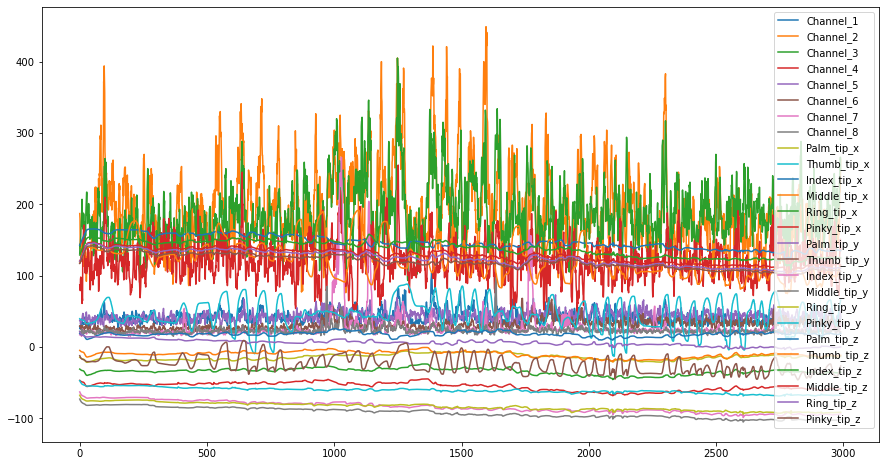

In [6]:
data.plot(figsize=(15, 8))

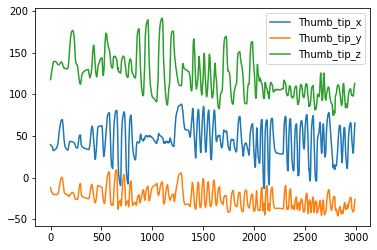

In [7]:
# Just considering the thumb
cols = ['Thumb_tip_x', 'Thumb_tip_y', 'Thumb_tip_z']
df = data[cols]
df.plot()

In [9]:
data.var()

Channel_1         80.197570
Channel_2       3275.590555
Channel_3       1665.979443
Channel_4        676.749023
Channel_5         44.517816
Channel_6         44.197014
Channel_7        469.975159
Channel_8         28.374523
Palm_tip_x        16.453664
Thumb_tip_x      385.674245
Index_tip_x        8.982888
Middle_tip_x      18.147344
Ring_tip_x        18.443590
Pinky_tip_x       31.013536
Palm_tip_y        19.143438
Thumb_tip_y      132.509408
Index_tip_y       62.744243
Middle_tip_y      49.295133
Ring_tip_y        29.295519
Pinky_tip_y       15.103892
Palm_tip_z        93.381700
Thumb_tip_z      589.463064
Index_tip_z      117.375134
Middle_tip_z     101.135309
Ring_tip_z       118.443732
Pinky_tip_z      100.485041
dtype: float64

In [12]:
import matplotlib

matplotlib.rc('figure', figsize=(15, 8))

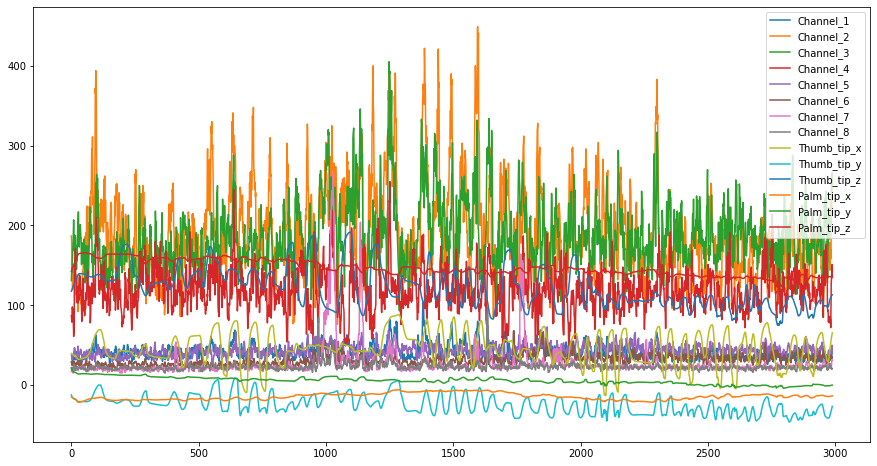

In [13]:
# Just considering the data we care about
cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8','Thumb_tip_x', 'Thumb_tip_y', 'Thumb_tip_z', 
       'Palm_tip_x', 'Palm_tip_y', 'Palm_tip_z']
df = data[cols]
df.plot()

[Text(0.5, 1.0, 'sEMG and Leap corrolations')]

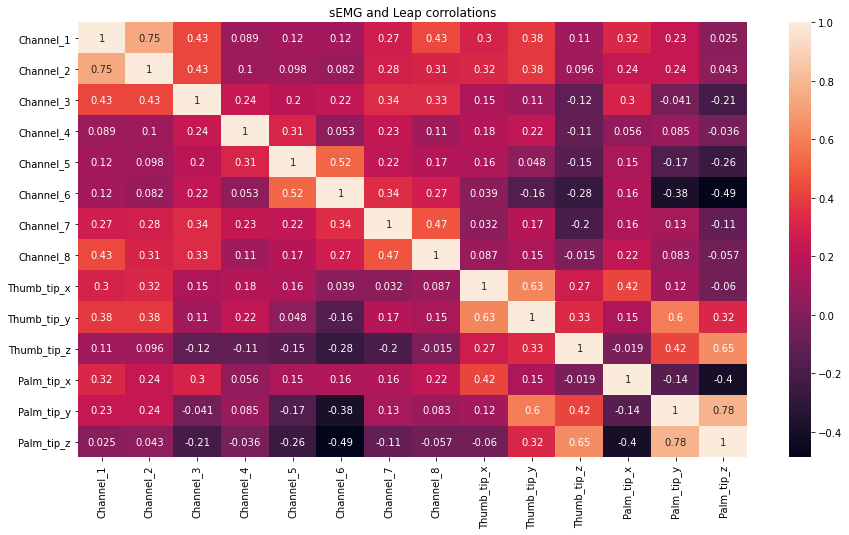

In [14]:
sns.heatmap(df.corr(), annot=True).set(title="sEMG and Leap corrolations")


## The 30 second thumb data
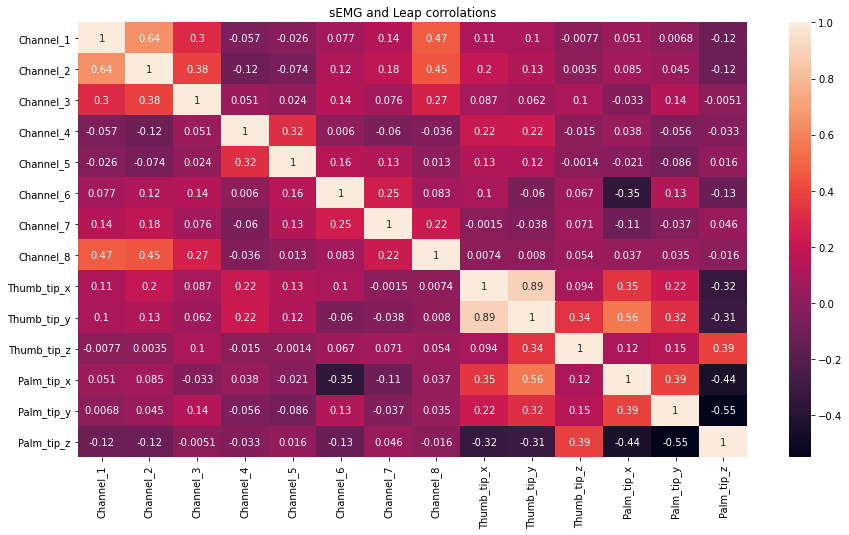

# Feature engineering: relative positions

<ipython-input-15-69a715ef4de4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rel["Thumb_r_tip_x"] = df_rel["Thumb_tip_x"] - df_rel['Palm_tip_x']
<ipython-input-15-69a715ef4de4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rel["Thumb_r_tip_y"] = df_rel["Thumb_tip_y"] - df_rel['Palm_tip_y']
<ipython-input-15-69a715ef4de4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

[Text(0.5, 1.0, 'sEMG and Leap rel corrolations')]

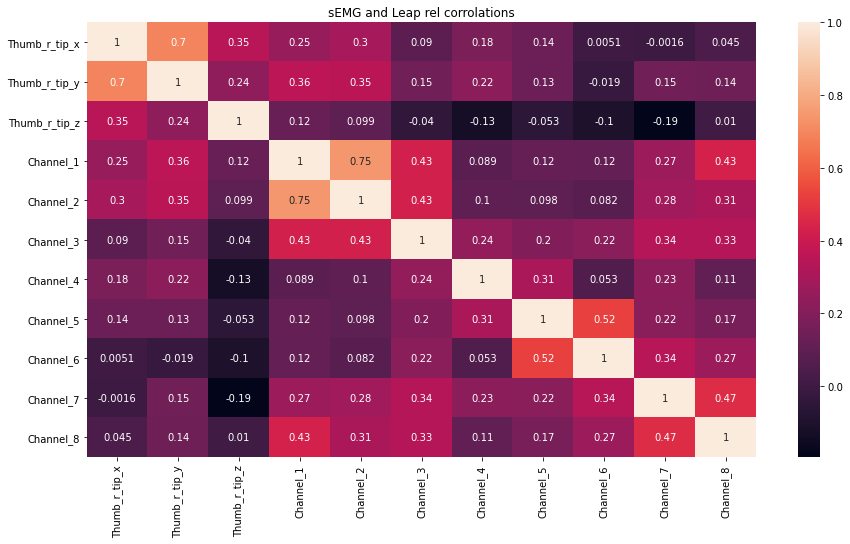

In [15]:
df_rel = df
df_rel["Thumb_r_tip_x"] = df_rel["Thumb_tip_x"] - df_rel['Palm_tip_x']
df_rel["Thumb_r_tip_y"] = df_rel["Thumb_tip_y"] - df_rel['Palm_tip_y']
df_rel["Thumb_r_tip_z"] = df_rel["Thumb_tip_z"] - df_rel['Palm_tip_z']

df_rel = df_rel[['Thumb_r_tip_x', 'Thumb_r_tip_y','Thumb_r_tip_z',
                 'Channel_1', 'Channel_2', 'Channel_3', 'Channel_4',
                 'Channel_5', 'Channel_6', 'Channel_7', 'Channel_8']]

sns.heatmap(df_rel.corr(), annot=True).set(title="sEMG and Leap rel corrolations")

# Making some baseline ML

In [21]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [22]:
y_cols = ['Thumb_r_tip_x', 'Thumb_r_tip_y','Thumb_r_tip_z']
x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4',
          'Channel_5', 'Channel_6', 'Channel_7', 'Channel_8']

y = df['Thumb_r_tip_x']
X = df[x_cols]
train_X, test_X, train_y, test_y = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.25)

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)

predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error Y: " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error Y: 12.530406516344152


In [33]:
for y_var in y_cols:
    y = df_rel[y_var]
    X = df_rel[x_cols]
    train_X, test_X, train_y, test_y = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.25)
    
    my_model = XGBRegressor()
    # Add silent=True to avoid printing out updates with each cycle
    my_model.fit(train_X, train_y, verbose=False)

    predictions = my_model.predict(test_X)

    from sklearn.metrics import mean_absolute_error
    print(f"Mean Absolute Error {y_var}: {str(mean_absolute_error(predictions, test_y))}")

Mean Absolute Error Thumb_r_tip_x: 12.332610593162437
Mean Absolute Error Thumb_r_tip_y: 6.195584156326975
Mean Absolute Error Thumb_r_tip_z: 11.162070653854526


Worse than the 30 second XGBoostRegressors by a few mms.

# Neural Network Approach

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

from sklearn.preprocessing import MinMaxScaler

In [40]:
y_cols = ['Thumb_r_tip_x', 'Thumb_r_tip_y','Thumb_r_tip_z']
x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4',
          'Channel_5', 'Channel_6', 'Channel_7', 'Channel_8']

y = df_rel[y_cols]
X = df_rel[x_cols]

rel_hand_scaler = MinMaxScaler()
emg_scaler = MinMaxScaler()

ny = rel_hand_scaler.fit_transform(y)
nX = emg_scaler.fit_transform(X)

train_X, test_X, train_y, test_y = train_test_split(nX, ny, test_size=0.25)

In [41]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(8, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(3, kernel_initializer='normal',activation='sigmoid'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2304      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 771       
Total params: 68,939
Trainable params: 68,939
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = NN_model.fit(train_X, train_y, epochs=500, batch_size=32, validation_split = 0.2)

Epoch 1/500
57/57 [==============================] - 0s 5ms/step - loss: 0.1744 - mean_absolute_error: 0.1744 - val_loss: 0.1677 - val_mean_absolute_error: 0.1677
Epoch 2/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1542 - mean_absolute_error: 0.1542 - val_loss: 0.1664 - val_mean_absolute_error: 0.1664
Epoch 3/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1534 - mean_absolute_error: 0.1534 - val_loss: 0.1658 - val_mean_absolute_error: 0.1658
Epoch 4/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1510 - mean_absolute_error: 0.1510 - val_loss: 0.1607 - val_mean_absolute_error: 0.1607
Epoch 5/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1481 - mean_absolute_error: 0.1481 - val_loss: 0.1593 - val_mean_absolute_error: 0.1593
Epoch 6/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1462 - mean_absolute_error: 0.1462 - val_loss: 0.1563 - val_mean_absolute_error: 0.1563
Epoch 7/500
57/57 [===

57/57 [==============================] - 0s 2ms/step - loss: 0.1380 - mean_absolute_error: 0.1380 - val_loss: 0.1500 - val_mean_absolute_error: 0.1500
Epoch 52/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1376 - mean_absolute_error: 0.1376 - val_loss: 0.1526 - val_mean_absolute_error: 0.1526
Epoch 53/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1391 - mean_absolute_error: 0.1391 - val_loss: 0.1504 - val_mean_absolute_error: 0.1504
Epoch 54/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1372 - mean_absolute_error: 0.1372 - val_loss: 0.1502 - val_mean_absolute_error: 0.1502
Epoch 55/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1377 - mean_absolute_error: 0.1377 - val_loss: 0.1505 - val_mean_absolute_error: 0.1505
Epoch 56/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1379 - mean_absolute_error: 0.1379 - val_loss: 0.1504 - val_mean_absolute_error: 0.1504
Epoch 57/500
57/57 [=========

57/57 [==============================] - 0s 2ms/step - loss: 0.1345 - mean_absolute_error: 0.1345 - val_loss: 0.1477 - val_mean_absolute_error: 0.1477
Epoch 102/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1337 - mean_absolute_error: 0.1337 - val_loss: 0.1498 - val_mean_absolute_error: 0.1498
Epoch 103/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1338 - mean_absolute_error: 0.1338 - val_loss: 0.1488 - val_mean_absolute_error: 0.1488
Epoch 104/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1343 - mean_absolute_error: 0.1343 - val_loss: 0.1495 - val_mean_absolute_error: 0.1495
Epoch 105/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1349 - mean_absolute_error: 0.1349 - val_loss: 0.1488 - val_mean_absolute_error: 0.1488
Epoch 106/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1334 - mean_absolute_error: 0.1334 - val_loss: 0.1486 - val_mean_absolute_error: 0.1486
Epoch 107/500
57/57 [===

Epoch 151/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - val_loss: 0.1462 - val_mean_absolute_error: 0.1462
Epoch 152/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1297 - mean_absolute_error: 0.1297 - val_loss: 0.1462 - val_mean_absolute_error: 0.1462
Epoch 153/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - val_loss: 0.1473 - val_mean_absolute_error: 0.1473
Epoch 154/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1297 - mean_absolute_error: 0.1297 - val_loss: 0.1472 - val_mean_absolute_error: 0.1472
Epoch 155/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1294 - mean_absolute_error: 0.1294 - val_loss: 0.1460 - val_mean_absolute_error: 0.1460
Epoch 156/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1298 - mean_absolute_error: 0.1298 - val_loss: 0.1460 - val_mean_absolute_error: 0.1460
Epoch 157/

Epoch 201/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1255 - mean_absolute_error: 0.1255 - val_loss: 0.1433 - val_mean_absolute_error: 0.1433
Epoch 202/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1263 - mean_absolute_error: 0.1263 - val_loss: 0.1426 - val_mean_absolute_error: 0.1426
Epoch 203/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1261 - mean_absolute_error: 0.1261 - val_loss: 0.1443 - val_mean_absolute_error: 0.1443
Epoch 204/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1262 - mean_absolute_error: 0.1262 - val_loss: 0.1434 - val_mean_absolute_error: 0.1434
Epoch 205/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1258 - mean_absolute_error: 0.1258 - val_loss: 0.1433 - val_mean_absolute_error: 0.1433
Epoch 206/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1256 - mean_absolute_error: 0.1256 - val_loss: 0.1435 - val_mean_absolute_error: 0.1435
Epoch 207/

Epoch 251/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1226 - mean_absolute_error: 0.1226 - val_loss: 0.1401 - val_mean_absolute_error: 0.1401
Epoch 252/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1226 - mean_absolute_error: 0.1226 - val_loss: 0.1420 - val_mean_absolute_error: 0.1420
Epoch 253/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1226 - mean_absolute_error: 0.1226 - val_loss: 0.1397 - val_mean_absolute_error: 0.1397
Epoch 254/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1227 - mean_absolute_error: 0.1227 - val_loss: 0.1417 - val_mean_absolute_error: 0.1417
Epoch 255/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1224 - mean_absolute_error: 0.1224 - val_loss: 0.1409 - val_mean_absolute_error: 0.1409
Epoch 256/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1230 - mean_absolute_error: 0.1230 - val_loss: 0.1418 - val_mean_absolute_error: 0.1418
Epoch 257/

Epoch 301/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1191 - mean_absolute_error: 0.1191 - val_loss: 0.1372 - val_mean_absolute_error: 0.1372
Epoch 302/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1195 - mean_absolute_error: 0.1195 - val_loss: 0.1372 - val_mean_absolute_error: 0.1372
Epoch 303/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1195 - mean_absolute_error: 0.1195 - val_loss: 0.1378 - val_mean_absolute_error: 0.1378
Epoch 304/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1191 - mean_absolute_error: 0.1191 - val_loss: 0.1379 - val_mean_absolute_error: 0.1379
Epoch 305/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1188 - mean_absolute_error: 0.1188 - val_loss: 0.1387 - val_mean_absolute_error: 0.1387
Epoch 306/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1189 - mean_absolute_error: 0.1189 - val_loss: 0.1375 - val_mean_absolute_error: 0.1375
Epoch 307/

Epoch 351/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1173 - mean_absolute_error: 0.1173 - val_loss: 0.1372 - val_mean_absolute_error: 0.1372
Epoch 352/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1160 - mean_absolute_error: 0.1160 - val_loss: 0.1376 - val_mean_absolute_error: 0.1376
Epoch 353/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1159 - mean_absolute_error: 0.1159 - val_loss: 0.1377 - val_mean_absolute_error: 0.1377
Epoch 354/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1158 - mean_absolute_error: 0.1158 - val_loss: 0.1369 - val_mean_absolute_error: 0.1369
Epoch 355/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1181 - mean_absolute_error: 0.1181 - val_loss: 0.1374 - val_mean_absolute_error: 0.1374
Epoch 356/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1160 - mean_absolute_error: 0.1160 - val_loss: 0.1350 - val_mean_absolute_error: 0.1350
Epoch 357/

Epoch 401/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1141 - mean_absolute_error: 0.1141 - val_loss: 0.1366 - val_mean_absolute_error: 0.1366
Epoch 402/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - val_loss: 0.1356 - val_mean_absolute_error: 0.1356
Epoch 403/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1145 - mean_absolute_error: 0.1145 - val_loss: 0.1366 - val_mean_absolute_error: 0.1366
Epoch 404/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1134 - mean_absolute_error: 0.1134 - val_loss: 0.1360 - val_mean_absolute_error: 0.1360
Epoch 405/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1128 - mean_absolute_error: 0.1128 - val_loss: 0.1355 - val_mean_absolute_error: 0.1355
Epoch 406/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1125 - mean_absolute_error: 0.1125 - val_loss: 0.1364 - val_mean_absolute_error: 0.1364
Epoch 407/

Epoch 451/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1136 - mean_absolute_error: 0.1136 - val_loss: 0.1356 - val_mean_absolute_error: 0.1356
Epoch 452/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1101 - mean_absolute_error: 0.1101 - val_loss: 0.1361 - val_mean_absolute_error: 0.1361
Epoch 453/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1102 - mean_absolute_error: 0.1102 - val_loss: 0.1359 - val_mean_absolute_error: 0.1359
Epoch 454/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1120 - mean_absolute_error: 0.1120 - val_loss: 0.1378 - val_mean_absolute_error: 0.1378
Epoch 455/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1101 - mean_absolute_error: 0.1101 - val_loss: 0.1368 - val_mean_absolute_error: 0.1368
Epoch 456/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1122 - mean_absolute_error: 0.1122 - val_loss: 0.1355 - val_mean_absolute_error: 0.1355
Epoch 457/

In [43]:
# Evaluate the model on the test data
loss, mea = NN_model.evaluate(test_X, test_y)
mea

24/24 [==============================] - 0s 910us/step - loss: 0.1288 - mean_absolute_error: 0.1288


0.1287817656993866

### Save the model and the scalers

In [46]:
import joblib

model_name = "NNRel-60secs-MinMaxScaled"

NN_model.save(f"../models/{model_name}.h5")
# Save hand scaler to file.
# Scales the output of the network, the relative position of the hand, min_max
joblib.dump(rel_hand_scaler, f'../models/{model_name}-Hand.gz')

# Scales the input to the network, the emg data. 
joblib.dump(emg_scaler, f'../models/{model_name}-EMG.gz')

['../models/NNRel-60secs-MinMaxScaled-EMG.gz']

In [49]:
# Making a prediction in the prediction script.
from keras.models import load_model
model = load_model(f"../models/{model_name}.h5")

input_scaler = joblib.load(f'../models/{model_name}-EMG.gz')
output_scaler = joblib.load(f'../models/{model_name}-Hand.gz')

# Get some input data
semg_input = np.array([[ 31, 140, 140,  83,  42,  30,  22,  21]])
# Scale the input
scaled_input = input_scaler.transform(semg_input)
# Get a prediction
pred = model.predict(scaled_input)
# Scale it back to a value
scaled_pred = output_scaler.inverse_transform(pred)
scaled_pred

array([[ 54.24801 , -32.00227 , -32.347813]], dtype=float32)

## Testing out different models

In [53]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(256, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(14, kernel_initializer='normal',activation='relu'))


# The Output Layer :
NN_model.add(Dense(3, kernel_initializer='normal',activation='sigmoid'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

history = NN_model.fit(train_X, train_y, epochs=500, batch_size=32, validation_split = 0.2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               2304      
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 14)                3598      
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 45        
Total params: 137,531
Trainable params: 137,531
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
57/57 [==============================] - 0s 3ms/step - loss: 0.1770 - mean_absolute_error: 0.1770 - va

Epoch 45/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1309 - mean_absolute_error: 0.1309 - val_loss: 0.1473 - val_mean_absolute_error: 0.1473
Epoch 46/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1302 - mean_absolute_error: 0.1302 - val_loss: 0.1421 - val_mean_absolute_error: 0.1421
Epoch 47/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1309 - mean_absolute_error: 0.1309 - val_loss: 0.1452 - val_mean_absolute_error: 0.1452
Epoch 48/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1283 - mean_absolute_error: 0.1283 - val_loss: 0.1421 - val_mean_absolute_error: 0.1421
Epoch 49/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1279 - mean_absolute_error: 0.1279 - val_loss: 0.1401 - val_mean_absolute_error: 0.1401
Epoch 50/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1280 - mean_absolute_error: 0.1280 - val_loss: 0.1402 - val_mean_absolute_error: 0.1402
Epoch 51/500
57/

Epoch 95/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1146 - mean_absolute_error: 0.1146 - val_loss: 0.1348 - val_mean_absolute_error: 0.1348
Epoch 96/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - val_loss: 0.1343 - val_mean_absolute_error: 0.1343
Epoch 97/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1138 - mean_absolute_error: 0.1138 - val_loss: 0.1320 - val_mean_absolute_error: 0.1320
Epoch 98/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1181 - mean_absolute_error: 0.1181 - val_loss: 0.1345 - val_mean_absolute_error: 0.1345
Epoch 99/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1135 - mean_absolute_error: 0.1135 - val_loss: 0.1330 - val_mean_absolute_error: 0.1330
Epoch 100/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1121 - mean_absolute_error: 0.1121 - val_loss: 0.1343 - val_mean_absolute_error: 0.1343
Epoch 101/500
5

Epoch 145/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1055 - mean_absolute_error: 0.1055 - val_loss: 0.1280 - val_mean_absolute_error: 0.1280
Epoch 146/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - val_loss: 0.1324 - val_mean_absolute_error: 0.1324
Epoch 147/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1104 - mean_absolute_error: 0.1104 - val_loss: 0.1291 - val_mean_absolute_error: 0.1291
Epoch 148/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1071 - mean_absolute_error: 0.1071 - val_loss: 0.1295 - val_mean_absolute_error: 0.1295
Epoch 149/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - val_loss: 0.1289 - val_mean_absolute_error: 0.1289
Epoch 150/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - val_loss: 0.1289 - val_mean_absolute_error: 0.1289
Epoch 151/

Epoch 195/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - val_loss: 0.1315 - val_mean_absolute_error: 0.1315
Epoch 196/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - val_loss: 0.1266 - val_mean_absolute_error: 0.1266
Epoch 197/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - val_loss: 0.1250 - val_mean_absolute_error: 0.1250
Epoch 198/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - val_loss: 0.1260 - val_mean_absolute_error: 0.1260
Epoch 199/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - val_loss: 0.1273 - val_mean_absolute_error: 0.1273
Epoch 200/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - val_loss: 0.1286 - val_mean_absolute_error: 0.1286
Epoch 201/

Epoch 245/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - val_loss: 0.1253 - val_mean_absolute_error: 0.1253
Epoch 246/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - val_loss: 0.1293 - val_mean_absolute_error: 0.1293
Epoch 247/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - val_loss: 0.1257 - val_mean_absolute_error: 0.1257
Epoch 248/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - val_loss: 0.1273 - val_mean_absolute_error: 0.1273
Epoch 249/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - val_loss: 0.1275 - val_mean_absolute_error: 0.1275
Epoch 250/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - val_loss: 0.1252 - val_mean_absolute_error: 0.1252
Epoch 251/

Epoch 295/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - val_loss: 0.1267 - val_mean_absolute_error: 0.1267
Epoch 296/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - val_loss: 0.1268 - val_mean_absolute_error: 0.1268
Epoch 297/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - val_loss: 0.1261 - val_mean_absolute_error: 0.1261
Epoch 298/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - val_loss: 0.1298 - val_mean_absolute_error: 0.1298
Epoch 299/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - val_loss: 0.1288 - val_mean_absolute_error: 0.1288
Epoch 300/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - val_loss: 0.1256 - val_mean_absolute_error: 0.1256
Epoch 301/

Epoch 345/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - val_loss: 0.1287 - val_mean_absolute_error: 0.1287
Epoch 346/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - val_loss: 0.1313 - val_mean_absolute_error: 0.1313
Epoch 347/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - val_loss: 0.1295 - val_mean_absolute_error: 0.1295
Epoch 348/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - val_loss: 0.1319 - val_mean_absolute_error: 0.1319
Epoch 349/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - val_loss: 0.1296 - val_mean_absolute_error: 0.1296
Epoch 350/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - val_loss: 0.1316 - val_mean_absolute_error: 0.1316
Epoch 351/

Epoch 395/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - val_loss: 0.1323 - val_mean_absolute_error: 0.1323
Epoch 396/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - val_loss: 0.1318 - val_mean_absolute_error: 0.1318
Epoch 397/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - val_loss: 0.1276 - val_mean_absolute_error: 0.1276
Epoch 398/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - val_loss: 0.1289 - val_mean_absolute_error: 0.1289
Epoch 399/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - val_loss: 0.1305 - val_mean_absolute_error: 0.1305
Epoch 400/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - val_loss: 0.1305 - val_mean_absolute_error: 0.1305
Epoch 401/

Epoch 445/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - val_loss: 0.1311 - val_mean_absolute_error: 0.1311
Epoch 446/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - val_loss: 0.1276 - val_mean_absolute_error: 0.1276
Epoch 447/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - val_loss: 0.1301 - val_mean_absolute_error: 0.1301
Epoch 448/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - val_loss: 0.1306 - val_mean_absolute_error: 0.1306
Epoch 449/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - val_loss: 0.1279 - val_mean_absolute_error: 0.1279
Epoch 450/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - val_loss: 0.1299 - val_mean_absolute_error: 0.1299
Epoch 451/

Epoch 495/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - val_loss: 0.1301 - val_mean_absolute_error: 0.1301
Epoch 496/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - val_loss: 0.1310 - val_mean_absolute_error: 0.1310
Epoch 497/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - val_loss: 0.1321 - val_mean_absolute_error: 0.1321
Epoch 498/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - val_loss: 0.1315 - val_mean_absolute_error: 0.1315
Epoch 499/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - val_loss: 0.1309 - val_mean_absolute_error: 0.1309
Epoch 500/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - val_loss: 0.1314 - val_mean_absolute_error: 0.1314


In [52]:
loss, mea = NN_model.evaluate(test_X, test_y)
mea

24/24 [==============================] - 0s 960us/step - loss: 0.1275 - mean_absolute_error: 0.1275


0.12748722732067108

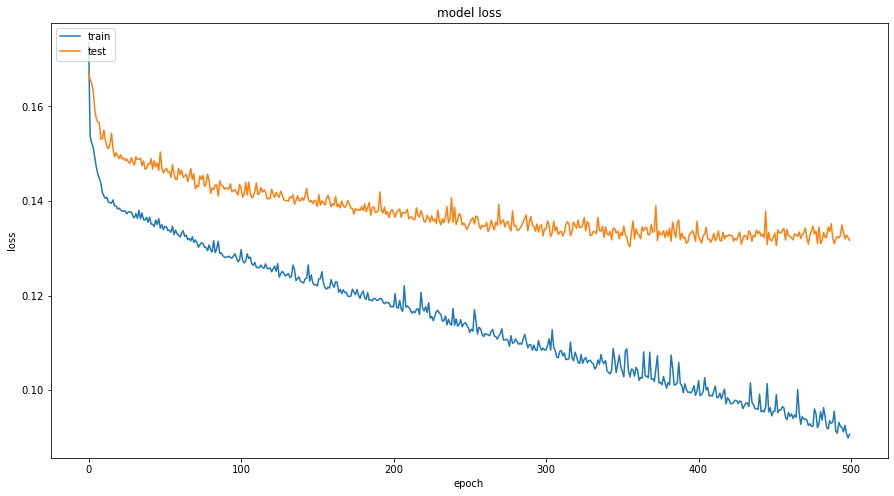

In [51]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 5 Layer net, BiggieSmalls

In [82]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(256, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(14, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(14, kernel_initializer='normal',activation='relu'))


# The Output Layer :
NN_model.add(Dense(3, kernel_initializer='normal',activation='sigmoid'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

history = NN_model.fit(train_X, train_y, epochs=500, batch_size=32, validation_split = 0.2)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 256)               2304      
_________________________________________________________________
dense_94 (Dense)             (None, 14)                3598      
_________________________________________________________________
dense_95 (Dense)             (None, 256)               3840      
_________________________________________________________________
dense_96 (Dense)             (None, 14)                3598      
_________________________________________________________________
dense_97 (Dense)             (None, 3)                 45        
Total params: 13,385
Trainable params: 13,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
57/57 [==============================] - 0s 6ms/step - loss: 0.1889 - mean_absolute_error: 0.1889 - val

Epoch 45/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1374 - mean_absolute_error: 0.1374 - val_loss: 0.1492 - val_mean_absolute_error: 0.1492
Epoch 46/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1373 - mean_absolute_error: 0.1373 - val_loss: 0.1492 - val_mean_absolute_error: 0.1492
Epoch 47/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1365 - mean_absolute_error: 0.1365 - val_loss: 0.1496 - val_mean_absolute_error: 0.1496
Epoch 48/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1365 - mean_absolute_error: 0.1365 - val_loss: 0.1498 - val_mean_absolute_error: 0.1498
Epoch 49/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1373 - mean_absolute_error: 0.1373 - val_loss: 0.1510 - val_mean_absolute_error: 0.1510
Epoch 50/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1369 - mean_absolute_error: 0.1369 - val_loss: 0.1500 - val_mean_absolute_error: 0.1500
Epoch 51/500
57/

Epoch 95/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1312 - mean_absolute_error: 0.1312 - val_loss: 0.1456 - val_mean_absolute_error: 0.1456
Epoch 96/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1312 - mean_absolute_error: 0.1312 - val_loss: 0.1456 - val_mean_absolute_error: 0.1456
Epoch 97/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1308 - mean_absolute_error: 0.1308 - val_loss: 0.1453 - val_mean_absolute_error: 0.1453
Epoch 98/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1312 - mean_absolute_error: 0.1312 - val_loss: 0.1452 - val_mean_absolute_error: 0.1452
Epoch 99/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1323 - mean_absolute_error: 0.1323 - val_loss: 0.1461 - val_mean_absolute_error: 0.1461
Epoch 100/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1311 - mean_absolute_error: 0.1311 - val_loss: 0.1440 - val_mean_absolute_error: 0.1440
Epoch 101/500
5

Epoch 145/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1247 - mean_absolute_error: 0.1247 - val_loss: 0.1421 - val_mean_absolute_error: 0.1421
Epoch 146/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1251 - mean_absolute_error: 0.1251 - val_loss: 0.1420 - val_mean_absolute_error: 0.1420
Epoch 147/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1255 - mean_absolute_error: 0.1255 - val_loss: 0.1419 - val_mean_absolute_error: 0.1419
Epoch 148/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1258 - mean_absolute_error: 0.1258 - val_loss: 0.1423 - val_mean_absolute_error: 0.1423
Epoch 149/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1250 - mean_absolute_error: 0.1250 - val_loss: 0.1419 - val_mean_absolute_error: 0.1419
Epoch 150/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1263 - mean_absolute_error: 0.1263 - val_loss: 0.1422 - val_mean_absolute_error: 0.1422
Epoch 151/

Epoch 195/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1199 - mean_absolute_error: 0.1199 - val_loss: 0.1401 - val_mean_absolute_error: 0.1401
Epoch 196/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1195 - mean_absolute_error: 0.1195 - val_loss: 0.1387 - val_mean_absolute_error: 0.1387
Epoch 197/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1191 - mean_absolute_error: 0.1191 - val_loss: 0.1408 - val_mean_absolute_error: 0.1408
Epoch 198/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1185 - mean_absolute_error: 0.1185 - val_loss: 0.1402 - val_mean_absolute_error: 0.1402
Epoch 199/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1184 - mean_absolute_error: 0.1184 - val_loss: 0.1423 - val_mean_absolute_error: 0.1423
Epoch 200/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1212 - mean_absolute_error: 0.1212 - val_loss: 0.1388 - val_mean_absolute_error: 0.1388
Epoch 201/

Epoch 245/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1164 - mean_absolute_error: 0.1164 - val_loss: 0.1391 - val_mean_absolute_error: 0.1391
Epoch 246/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1135 - mean_absolute_error: 0.1135 - val_loss: 0.1386 - val_mean_absolute_error: 0.1386
Epoch 247/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1133 - mean_absolute_error: 0.1133 - val_loss: 0.1392 - val_mean_absolute_error: 0.1392
Epoch 248/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1135 - mean_absolute_error: 0.1135 - val_loss: 0.1377 - val_mean_absolute_error: 0.1377
Epoch 249/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1130 - mean_absolute_error: 0.1130 - val_loss: 0.1386 - val_mean_absolute_error: 0.1386
Epoch 250/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1143 - mean_absolute_error: 0.1143 - val_loss: 0.1384 - val_mean_absolute_error: 0.1384
Epoch 251/

Epoch 295/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1136 - mean_absolute_error: 0.1136 - val_loss: 0.1400 - val_mean_absolute_error: 0.1400
Epoch 296/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1167 - mean_absolute_error: 0.1167 - val_loss: 0.1398 - val_mean_absolute_error: 0.1398
Epoch 297/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1133 - mean_absolute_error: 0.1133 - val_loss: 0.1383 - val_mean_absolute_error: 0.1383
Epoch 298/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1109 - mean_absolute_error: 0.1109 - val_loss: 0.1370 - val_mean_absolute_error: 0.1370
Epoch 299/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1098 - mean_absolute_error: 0.1098 - val_loss: 0.1390 - val_mean_absolute_error: 0.1390
Epoch 300/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1091 - mean_absolute_error: 0.1091 - val_loss: 0.1439 - val_mean_absolute_error: 0.1439
Epoch 301/

Epoch 345/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1063 - mean_absolute_error: 0.1063 - val_loss: 0.1373 - val_mean_absolute_error: 0.1373
Epoch 346/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1048 - mean_absolute_error: 0.1048 - val_loss: 0.1388 - val_mean_absolute_error: 0.1388
Epoch 347/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1047 - mean_absolute_error: 0.1047 - val_loss: 0.1403 - val_mean_absolute_error: 0.1403
Epoch 348/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - val_loss: 0.1393 - val_mean_absolute_error: 0.1393
Epoch 349/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - val_loss: 0.1410 - val_mean_absolute_error: 0.1410
Epoch 350/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - val_loss: 0.1372 - val_mean_absolute_error: 0.1372
Epoch 351/

Epoch 395/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1019 - mean_absolute_error: 0.1019 - val_loss: 0.1402 - val_mean_absolute_error: 0.1402
Epoch 396/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1029 - mean_absolute_error: 0.1029 - val_loss: 0.1386 - val_mean_absolute_error: 0.1386
Epoch 397/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1012 - mean_absolute_error: 0.1012 - val_loss: 0.1410 - val_mean_absolute_error: 0.1410
Epoch 398/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1011 - mean_absolute_error: 0.1011 - val_loss: 0.1382 - val_mean_absolute_error: 0.1382
Epoch 399/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - val_loss: 0.1394 - val_mean_absolute_error: 0.1394
Epoch 400/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1012 - mean_absolute_error: 0.1012 - val_loss: 0.1366 - val_mean_absolute_error: 0.1366
Epoch 401/

Epoch 445/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - val_loss: 0.1394 - val_mean_absolute_error: 0.1394
Epoch 446/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - val_loss: 0.1390 - val_mean_absolute_error: 0.1390
Epoch 447/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - val_loss: 0.1392 - val_mean_absolute_error: 0.1392
Epoch 448/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - val_loss: 0.1414 - val_mean_absolute_error: 0.1414
Epoch 449/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - val_loss: 0.1397 - val_mean_absolute_error: 0.1397
Epoch 450/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - val_loss: 0.1385 - val_mean_absolute_error: 0.1385
Epoch 451/

Epoch 495/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - val_loss: 0.1368 - val_mean_absolute_error: 0.1368
Epoch 496/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0951 - mean_absolute_error: 0.0951 - val_loss: 0.1400 - val_mean_absolute_error: 0.1400
Epoch 497/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - val_loss: 0.1375 - val_mean_absolute_error: 0.1375
Epoch 498/500
57/57 [==============================] - 0s 2ms/step - loss: 0.1034 - mean_absolute_error: 0.1034 - val_loss: 0.1420 - val_mean_absolute_error: 0.1420
Epoch 499/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - val_loss: 0.1376 - val_mean_absolute_error: 0.1376
Epoch 500/500
57/57 [==============================] - 0s 2ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - val_loss: 0.1368 - val_mean_absolute_error: 0.1368


loss: 0.0988 - mean_absolute_error: 0.0988 - val_loss: 0.1297 - val_mean_absolute_error: 0.1297

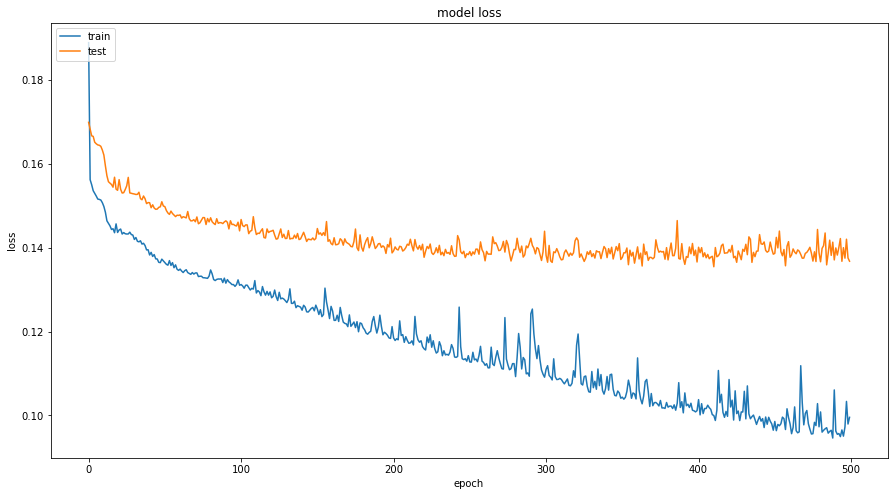

In [83]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [84]:
loss, mea = NN_model.evaluate(test_X, test_y)
mea

24/24 [==============================] - 0s 875us/step - loss: 0.1274 - mean_absolute_error: 0.1274


0.12742246687412262

In [85]:
model_name = "NNRel-60secs-BS-MinMaxScaled"

NN_model.save(f"../models/{model_name}.h5")
# Save hand scaler to file.
# Scales the output of the network, the relative position of the hand, min_max
joblib.dump(rel_hand_scaler, f'../models/{model_name}-Hand.gz')

# Scales the input to the network, the emg data. 
joblib.dump(emg_scaler, f'../models/{model_name}-EMG.gz')

['../models/NNRel-60secs-BS-MinMaxScaled-EMG.gz']

## Other models tried

In [57]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(64, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(14, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(14, kernel_initializer='normal',activation='relu'))


# The Output Layer :
NN_model.add(Dense(3, kernel_initializer='normal',activation='sigmoid'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

history = NN_model.fit(train_X, train_y, epochs=100, batch_size=32, validation_split = 0.2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_23 (Dense)             (None, 14)                910       
_________________________________________________________________
dense_24 (Dense)             (None, 256)               3840      
_________________________________________________________________
dense_25 (Dense)             (None, 14)                3598      
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 45        
Total params: 8,969
Trainable params: 8,969
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
57/57 [==============================] - 0s 3ms/step - loss: 0.1953 - mean_absolute_error: 0.1953 - val_lo

Epoch 45/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1428 - mean_absolute_error: 0.1428 - val_loss: 0.1516 - val_mean_absolute_error: 0.1516
Epoch 46/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1417 - mean_absolute_error: 0.1417 - val_loss: 0.1539 - val_mean_absolute_error: 0.1539
Epoch 47/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1413 - mean_absolute_error: 0.1413 - val_loss: 0.1518 - val_mean_absolute_error: 0.1518
Epoch 48/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1408 - mean_absolute_error: 0.1408 - val_loss: 0.1513 - val_mean_absolute_error: 0.1513
Epoch 49/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1407 - mean_absolute_error: 0.1407 - val_loss: 0.1514 - val_mean_absolute_error: 0.1514
Epoch 50/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1397 - mean_absolute_error: 0.1397 - val_loss: 0.1506 - val_mean_absolute_error: 0.1506
Epoch 51/100
57/

Epoch 95/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1350 - mean_absolute_error: 0.1350 - val_loss: 0.1479 - val_mean_absolute_error: 0.1479
Epoch 96/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1354 - mean_absolute_error: 0.1354 - val_loss: 0.1477 - val_mean_absolute_error: 0.1477
Epoch 97/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1374 - mean_absolute_error: 0.1374 - val_loss: 0.1478 - val_mean_absolute_error: 0.1478
Epoch 98/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1359 - mean_absolute_error: 0.1359 - val_loss: 0.1484 - val_mean_absolute_error: 0.1484
Epoch 99/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1354 - mean_absolute_error: 0.1354 - val_loss: 0.1479 - val_mean_absolute_error: 0.1479
Epoch 100/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1360 - mean_absolute_error: 0.1360 - val_loss: 0.1476 - val_mean_absolute_error: 0.1476


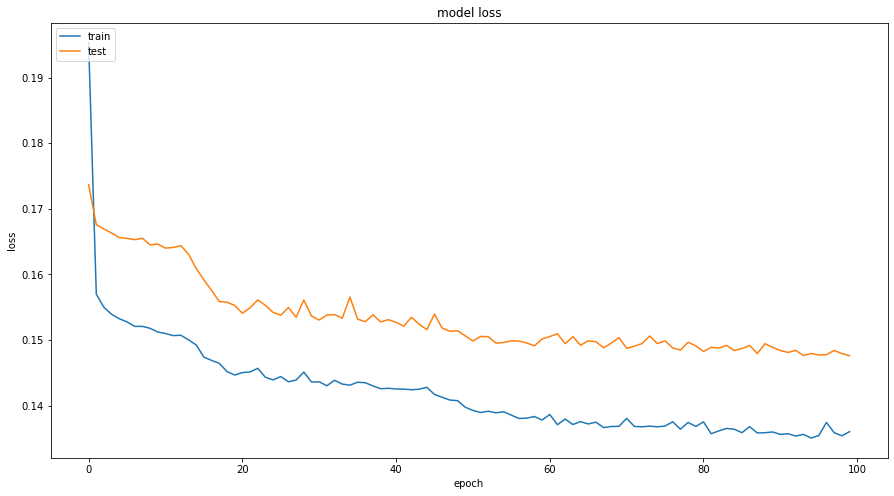

In [58]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(64, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(14, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(14, kernel_initializer='normal',activation='relu'))


# The Output Layer :
NN_model.add(Dense(3, kernel_initializer='normal',activation='sigmoid'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

history = NN_model.fit(train_X, train_y, epochs=60, batch_size=32, validation_split = 0.2)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_28 (Dense)             (None, 14)                910       
_________________________________________________________________
dense_29 (Dense)             (None, 256)               3840      
_________________________________________________________________
dense_30 (Dense)             (None, 14)                3598      
_________________________________________________________________
dense_31 (Dense)             (None, 3)                 45        
Total params: 8,969
Trainable params: 8,969
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
57/57 [==============================] - 0s 3ms/step - loss: 0.1991 - mean_absolute_error: 0.1991 - val_los

57/57 [==============================] - 0s 2ms/step - loss: 0.1397 - mean_absolute_error: 0.1397 - val_loss: 0.1503 - val_mean_absolute_error: 0.1503
Epoch 46/60
57/57 [==============================] - 0s 2ms/step - loss: 0.1402 - mean_absolute_error: 0.1402 - val_loss: 0.1501 - val_mean_absolute_error: 0.1501
Epoch 47/60
57/57 [==============================] - 0s 2ms/step - loss: 0.1391 - mean_absolute_error: 0.1391 - val_loss: 0.1500 - val_mean_absolute_error: 0.1500
Epoch 48/60
57/57 [==============================] - 0s 2ms/step - loss: 0.1387 - mean_absolute_error: 0.1387 - val_loss: 0.1515 - val_mean_absolute_error: 0.1515
Epoch 49/60
57/57 [==============================] - 0s 2ms/step - loss: 0.1381 - mean_absolute_error: 0.1381 - val_loss: 0.1498 - val_mean_absolute_error: 0.1498
Epoch 50/60
57/57 [==============================] - 0s 2ms/step - loss: 0.1376 - mean_absolute_error: 0.1376 - val_loss: 0.1488 - val_mean_absolute_error: 0.1488
Epoch 51/60
57/57 [===============

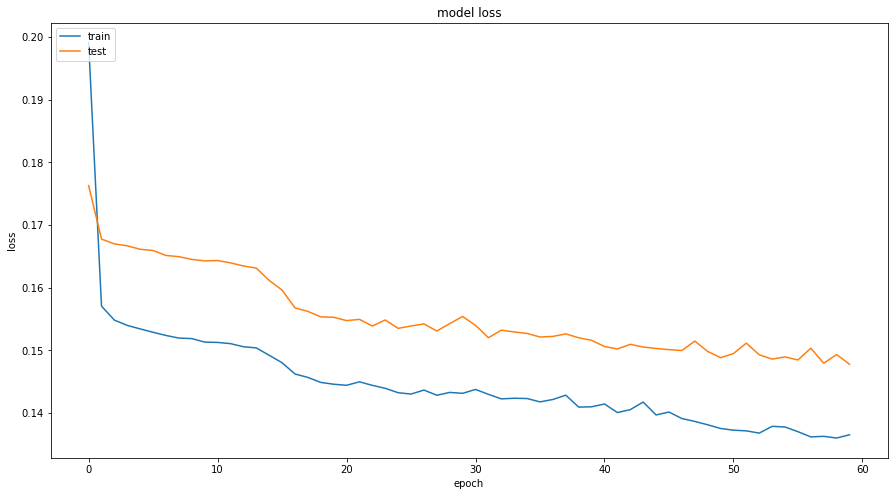

In [60]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(32, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(14, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(14, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(3, kernel_initializer='normal',activation='sigmoid'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

history = NN_model.fit(train_X, train_y, epochs=200, batch_size=32, validation_split = 0.2)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_42 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_43 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_44 (Dense)             (None, 256)               8448      
_________________________________________________________________
dense_45 (Dense)             (None, 32)                8224      
_________________________________________________________________
dense_46 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_47 (Dense)             (None, 32)               

Epoch 41/200
57/57 [==============================] - 0s 3ms/step - loss: 0.1460 - mean_absolute_error: 0.1460 - val_loss: 0.1553 - val_mean_absolute_error: 0.1553
Epoch 42/200
57/57 [==============================] - 0s 3ms/step - loss: 0.1442 - mean_absolute_error: 0.1442 - val_loss: 0.1562 - val_mean_absolute_error: 0.1562
Epoch 43/200
57/57 [==============================] - 0s 3ms/step - loss: 0.1446 - mean_absolute_error: 0.1446 - val_loss: 0.1552 - val_mean_absolute_error: 0.1552
Epoch 44/200
57/57 [==============================] - 0s 3ms/step - loss: 0.1435 - mean_absolute_error: 0.1435 - val_loss: 0.1554 - val_mean_absolute_error: 0.1554
Epoch 45/200
57/57 [==============================] - 0s 3ms/step - loss: 0.1447 - mean_absolute_error: 0.1447 - val_loss: 0.1557 - val_mean_absolute_error: 0.1557
Epoch 46/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1436 - mean_absolute_error: 0.1436 - val_loss: 0.1541 - val_mean_absolute_error: 0.1541
Epoch 47/200
57/

Epoch 91/200
57/57 [==============================] - 0s 3ms/step - loss: 0.1404 - mean_absolute_error: 0.1404 - val_loss: 0.1516 - val_mean_absolute_error: 0.1516
Epoch 92/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1400 - mean_absolute_error: 0.1400 - val_loss: 0.1517 - val_mean_absolute_error: 0.1517
Epoch 93/200
57/57 [==============================] - 0s 3ms/step - loss: 0.1405 - mean_absolute_error: 0.1405 - val_loss: 0.1528 - val_mean_absolute_error: 0.1528
Epoch 94/200
57/57 [==============================] - 0s 3ms/step - loss: 0.1417 - mean_absolute_error: 0.1417 - val_loss: 0.1524 - val_mean_absolute_error: 0.1524
Epoch 95/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1402 - mean_absolute_error: 0.1402 - val_loss: 0.1554 - val_mean_absolute_error: 0.1554
Epoch 96/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1440 - mean_absolute_error: 0.1440 - val_loss: 0.1529 - val_mean_absolute_error: 0.1529
Epoch 97/200
57/

Epoch 141/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1386 - mean_absolute_error: 0.1386 - val_loss: 0.1502 - val_mean_absolute_error: 0.1502
Epoch 142/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1397 - mean_absolute_error: 0.1397 - val_loss: 0.1509 - val_mean_absolute_error: 0.1509
Epoch 143/200
57/57 [==============================] - 0s 3ms/step - loss: 0.1394 - mean_absolute_error: 0.1394 - val_loss: 0.1499 - val_mean_absolute_error: 0.1499
Epoch 144/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1400 - mean_absolute_error: 0.1400 - val_loss: 0.1501 - val_mean_absolute_error: 0.1501
Epoch 145/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1393 - mean_absolute_error: 0.1393 - val_loss: 0.1507 - val_mean_absolute_error: 0.1507
Epoch 146/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1396 - mean_absolute_error: 0.1396 - val_loss: 0.1504 - val_mean_absolute_error: 0.1504
Epoch 147/

Epoch 191/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1380 - mean_absolute_error: 0.1380 - val_loss: 0.1497 - val_mean_absolute_error: 0.1497
Epoch 192/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1376 - mean_absolute_error: 0.1376 - val_loss: 0.1503 - val_mean_absolute_error: 0.1503
Epoch 193/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1378 - mean_absolute_error: 0.1378 - val_loss: 0.1494 - val_mean_absolute_error: 0.1494
Epoch 194/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1373 - mean_absolute_error: 0.1373 - val_loss: 0.1500 - val_mean_absolute_error: 0.1500
Epoch 195/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1367 - mean_absolute_error: 0.1367 - val_loss: 0.1497 - val_mean_absolute_error: 0.1497
Epoch 196/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1362 - mean_absolute_error: 0.1362 - val_loss: 0.1509 - val_mean_absolute_error: 0.1509
Epoch 197/

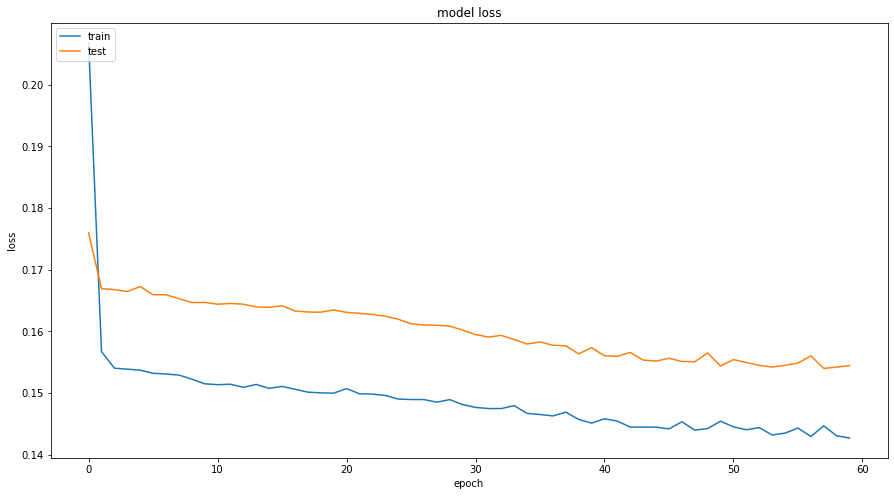

In [63]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [65]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(32, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(14, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(3, kernel_initializer='normal',activation='sigmoid'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

history = NN_model.fit(train_X, train_y, epochs=200, batch_size=32, validation_split = 0.2)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_52 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_53 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_54 (Dense)             (None, 14)                462       
_________________________________________________________________
dense_55 (Dense)             (None, 3)                 45        
Total params: 2,907
Trainable params: 2,907
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
57/57 [==============================] - 0s 3ms/step - loss: 0.2071 - mean_absolute_error: 0.2071 - val_lo

Epoch 45/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1461 - mean_absolute_error: 0.1461 - val_loss: 0.1580 - val_mean_absolute_error: 0.1580
Epoch 46/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1461 - mean_absolute_error: 0.1461 - val_loss: 0.1578 - val_mean_absolute_error: 0.1578
Epoch 47/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1460 - mean_absolute_error: 0.1460 - val_loss: 0.1579 - val_mean_absolute_error: 0.1579
Epoch 48/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1458 - mean_absolute_error: 0.1458 - val_loss: 0.1577 - val_mean_absolute_error: 0.1577
Epoch 49/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1457 - mean_absolute_error: 0.1457 - val_loss: 0.1574 - val_mean_absolute_error: 0.1574
Epoch 50/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1457 - mean_absolute_error: 0.1457 - val_loss: 0.1586 - val_mean_absolute_error: 0.1586
Epoch 51/200
57/

Epoch 95/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1433 - mean_absolute_error: 0.1433 - val_loss: 0.1544 - val_mean_absolute_error: 0.1544
Epoch 96/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1433 - mean_absolute_error: 0.1433 - val_loss: 0.1541 - val_mean_absolute_error: 0.1541
Epoch 97/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1432 - mean_absolute_error: 0.1432 - val_loss: 0.1540 - val_mean_absolute_error: 0.1540
Epoch 98/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1429 - mean_absolute_error: 0.1429 - val_loss: 0.1537 - val_mean_absolute_error: 0.1537
Epoch 99/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1426 - mean_absolute_error: 0.1426 - val_loss: 0.1539 - val_mean_absolute_error: 0.1539
Epoch 100/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1423 - mean_absolute_error: 0.1423 - val_loss: 0.1534 - val_mean_absolute_error: 0.1534
Epoch 101/200
5

Epoch 145/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1387 - mean_absolute_error: 0.1387 - val_loss: 0.1504 - val_mean_absolute_error: 0.1504
Epoch 146/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1390 - mean_absolute_error: 0.1390 - val_loss: 0.1507 - val_mean_absolute_error: 0.1507
Epoch 147/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1388 - mean_absolute_error: 0.1388 - val_loss: 0.1505 - val_mean_absolute_error: 0.1505
Epoch 148/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1389 - mean_absolute_error: 0.1389 - val_loss: 0.1509 - val_mean_absolute_error: 0.1509
Epoch 149/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1386 - mean_absolute_error: 0.1386 - val_loss: 0.1500 - val_mean_absolute_error: 0.1500
Epoch 150/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1388 - mean_absolute_error: 0.1388 - val_loss: 0.1503 - val_mean_absolute_error: 0.1503
Epoch 151/

Epoch 195/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1385 - mean_absolute_error: 0.1385 - val_loss: 0.1510 - val_mean_absolute_error: 0.1510
Epoch 196/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1377 - mean_absolute_error: 0.1377 - val_loss: 0.1498 - val_mean_absolute_error: 0.1498
Epoch 197/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1377 - mean_absolute_error: 0.1377 - val_loss: 0.1504 - val_mean_absolute_error: 0.1504
Epoch 198/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1374 - mean_absolute_error: 0.1374 - val_loss: 0.1500 - val_mean_absolute_error: 0.1500
Epoch 199/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1373 - mean_absolute_error: 0.1373 - val_loss: 0.1497 - val_mean_absolute_error: 0.1497
Epoch 200/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1378 - mean_absolute_error: 0.1378 - val_loss: 0.1503 - val_mean_absolute_error: 0.1503


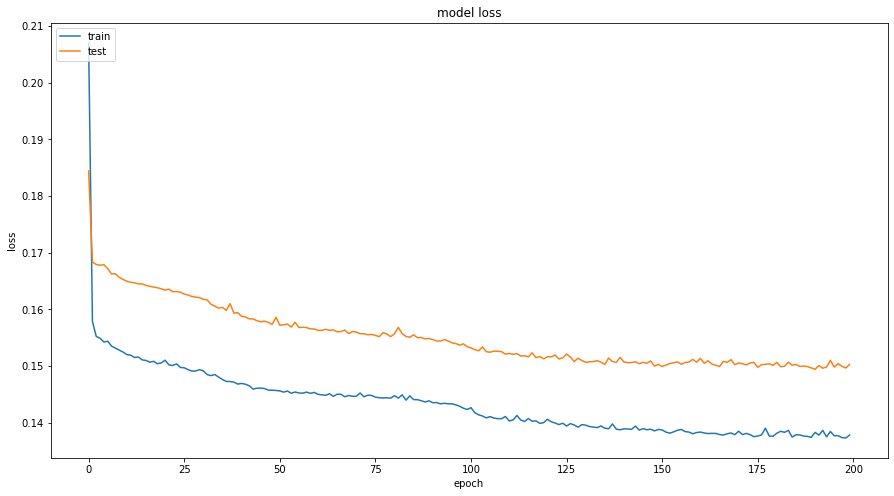

In [66]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [68]:
from keras.layers import Dropout

In [69]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(32, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.2))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(14, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(3, kernel_initializer='normal',activation='sigmoid'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

history = NN_model.fit(train_X, train_y, epochs=200, batch_size=32, validation_split = 0.2)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_59 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_60 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_61 (Dense)             (None, 14)                462       
_________________________________________________________________
dense_62 (Dense)             (None, 3)                 45        
Total params: 2,907
Trainable params: 2,907
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
57/57 [==============================] - 0s 3ms/step - loss: 0.2086 - mean_absolute_error: 0.2086 - val_l

Epoch 45/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1435 - mean_absolute_error: 0.1435 - val_loss: 0.1535 - val_mean_absolute_error: 0.1535
Epoch 46/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1434 - mean_absolute_error: 0.1434 - val_loss: 0.1543 - val_mean_absolute_error: 0.1543
Epoch 47/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1440 - mean_absolute_error: 0.1440 - val_loss: 0.1542 - val_mean_absolute_error: 0.1542
Epoch 48/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1434 - mean_absolute_error: 0.1434 - val_loss: 0.1535 - val_mean_absolute_error: 0.1535
Epoch 49/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1436 - mean_absolute_error: 0.1436 - val_loss: 0.1536 - val_mean_absolute_error: 0.1536
Epoch 50/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1431 - mean_absolute_error: 0.1431 - val_loss: 0.1536 - val_mean_absolute_error: 0.1536
Epoch 51/200
57/

Epoch 95/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1389 - mean_absolute_error: 0.1389 - val_loss: 0.1526 - val_mean_absolute_error: 0.1526
Epoch 96/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1393 - mean_absolute_error: 0.1393 - val_loss: 0.1516 - val_mean_absolute_error: 0.1516
Epoch 97/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1390 - mean_absolute_error: 0.1390 - val_loss: 0.1512 - val_mean_absolute_error: 0.1512
Epoch 98/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1391 - mean_absolute_error: 0.1391 - val_loss: 0.1515 - val_mean_absolute_error: 0.1515
Epoch 99/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1388 - mean_absolute_error: 0.1388 - val_loss: 0.1513 - val_mean_absolute_error: 0.1513
Epoch 100/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1388 - mean_absolute_error: 0.1388 - val_loss: 0.1520 - val_mean_absolute_error: 0.1520
Epoch 101/200
5

Epoch 145/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1377 - mean_absolute_error: 0.1377 - val_loss: 0.1502 - val_mean_absolute_error: 0.1502
Epoch 146/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1376 - mean_absolute_error: 0.1376 - val_loss: 0.1504 - val_mean_absolute_error: 0.1504
Epoch 147/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1385 - mean_absolute_error: 0.1385 - val_loss: 0.1501 - val_mean_absolute_error: 0.1501
Epoch 148/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1376 - mean_absolute_error: 0.1376 - val_loss: 0.1502 - val_mean_absolute_error: 0.1502
Epoch 149/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1373 - mean_absolute_error: 0.1373 - val_loss: 0.1510 - val_mean_absolute_error: 0.1510
Epoch 150/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1380 - mean_absolute_error: 0.1380 - val_loss: 0.1504 - val_mean_absolute_error: 0.1504
Epoch 151/

Epoch 195/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1366 - mean_absolute_error: 0.1366 - val_loss: 0.1499 - val_mean_absolute_error: 0.1499
Epoch 196/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1361 - mean_absolute_error: 0.1361 - val_loss: 0.1495 - val_mean_absolute_error: 0.1495
Epoch 197/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1365 - mean_absolute_error: 0.1365 - val_loss: 0.1500 - val_mean_absolute_error: 0.1500
Epoch 198/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1362 - mean_absolute_error: 0.1362 - val_loss: 0.1490 - val_mean_absolute_error: 0.1490
Epoch 199/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1361 - mean_absolute_error: 0.1361 - val_loss: 0.1493 - val_mean_absolute_error: 0.1493
Epoch 200/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1363 - mean_absolute_error: 0.1363 - val_loss: 0.1498 - val_mean_absolute_error: 0.1498


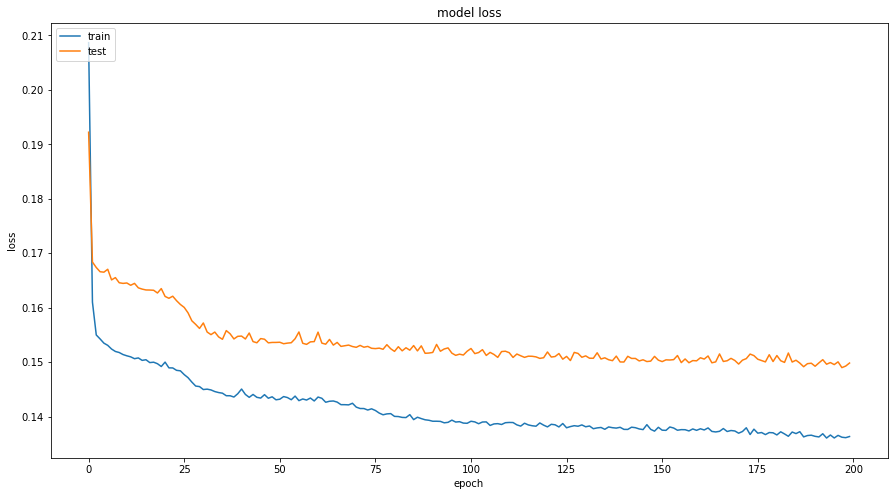

In [70]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [75]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(32, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.2))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.2))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(14, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(3, kernel_initializer='normal',activation='sigmoid'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

history = NN_model.fit(train_X, train_y, epochs=100, batch_size=64, validation_split = 0.2)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_76 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_77 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_78 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_79 (Dense)             (None, 14)              

29/29 [==============================] - 0s 2ms/step - loss: 0.1494 - mean_absolute_error: 0.1494 - val_loss: 0.1614 - val_mean_absolute_error: 0.1614
Epoch 43/100
29/29 [==============================] - 0s 3ms/step - loss: 0.1498 - mean_absolute_error: 0.1498 - val_loss: 0.1609 - val_mean_absolute_error: 0.1609
Epoch 44/100
29/29 [==============================] - 0s 3ms/step - loss: 0.1489 - mean_absolute_error: 0.1489 - val_loss: 0.1609 - val_mean_absolute_error: 0.1609
Epoch 45/100
29/29 [==============================] - 0s 2ms/step - loss: 0.1496 - mean_absolute_error: 0.1496 - val_loss: 0.1613 - val_mean_absolute_error: 0.1613
Epoch 46/100
29/29 [==============================] - 0s 2ms/step - loss: 0.1488 - mean_absolute_error: 0.1488 - val_loss: 0.1604 - val_mean_absolute_error: 0.1604
Epoch 47/100
29/29 [==============================] - 0s 2ms/step - loss: 0.1485 - mean_absolute_error: 0.1485 - val_loss: 0.1599 - val_mean_absolute_error: 0.1599
Epoch 48/100
29/29 [=========

29/29 [==============================] - 0s 3ms/step - loss: 0.1447 - mean_absolute_error: 0.1447 - val_loss: 0.1551 - val_mean_absolute_error: 0.1551
Epoch 93/100
29/29 [==============================] - 0s 2ms/step - loss: 0.1436 - mean_absolute_error: 0.1436 - val_loss: 0.1542 - val_mean_absolute_error: 0.1542
Epoch 94/100
29/29 [==============================] - 0s 2ms/step - loss: 0.1440 - mean_absolute_error: 0.1440 - val_loss: 0.1549 - val_mean_absolute_error: 0.1549
Epoch 95/100
29/29 [==============================] - 0s 2ms/step - loss: 0.1446 - mean_absolute_error: 0.1446 - val_loss: 0.1545 - val_mean_absolute_error: 0.1545
Epoch 96/100
29/29 [==============================] - 0s 2ms/step - loss: 0.1442 - mean_absolute_error: 0.1442 - val_loss: 0.1546 - val_mean_absolute_error: 0.1546
Epoch 97/100
29/29 [==============================] - 0s 2ms/step - loss: 0.1433 - mean_absolute_error: 0.1433 - val_loss: 0.1542 - val_mean_absolute_error: 0.1542
Epoch 98/100
29/29 [=========

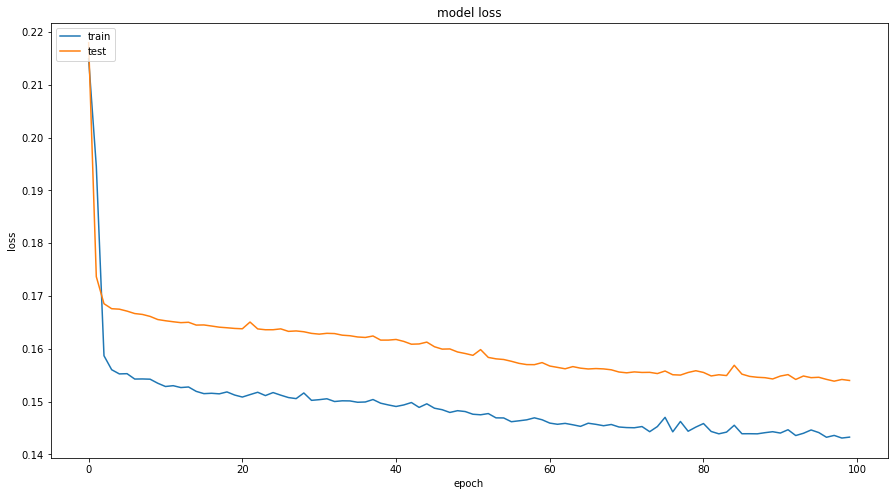

In [76]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [77]:
# Evaluate the model on the test data
loss, mea = NN_model.evaluate(test_X, test_y)
mea

24/24 [==============================] - 0s 1ms/step - loss: 0.1451 - mean_absolute_error: 0.1451


0.1450718194246292

In [79]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(32, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(14, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(14, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(3, kernel_initializer='normal',activation='sigmoid'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

history = NN_model.fit(train_X, train_y, epochs=200, batch_size=64, validation_split = 0.2)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_88 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_89 (Dense)             (None, 14)                462       
_________________________________________________________________
dense_90 (Dense)             (None, 32)                480       
_________________________________________________________________
dense_91 (Dense)             (None, 14)                462       
_________________________________________________________________
dense_92 (Dense)             (None, 3)                 45        
Total params: 2,793
Trainable params: 2,793
Non-trainable params: 0
___________________________________________________

29/29 [==============================] - 0s 2ms/step - loss: 0.1439 - mean_absolute_error: 0.1439 - val_loss: 0.1541 - val_mean_absolute_error: 0.1541
Epoch 45/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1437 - mean_absolute_error: 0.1437 - val_loss: 0.1541 - val_mean_absolute_error: 0.1541
Epoch 46/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1453 - mean_absolute_error: 0.1453 - val_loss: 0.1546 - val_mean_absolute_error: 0.1546
Epoch 47/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1444 - mean_absolute_error: 0.1444 - val_loss: 0.1555 - val_mean_absolute_error: 0.1555
Epoch 48/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1436 - mean_absolute_error: 0.1436 - val_loss: 0.1540 - val_mean_absolute_error: 0.1540
Epoch 49/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1442 - mean_absolute_error: 0.1442 - val_loss: 0.1566 - val_mean_absolute_error: 0.1566
Epoch 50/200
29/29 [=========

29/29 [==============================] - 0s 2ms/step - loss: 0.1422 - mean_absolute_error: 0.1422 - val_loss: 0.1524 - val_mean_absolute_error: 0.1524
Epoch 95/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1425 - mean_absolute_error: 0.1425 - val_loss: 0.1530 - val_mean_absolute_error: 0.1530
Epoch 96/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1429 - mean_absolute_error: 0.1429 - val_loss: 0.1528 - val_mean_absolute_error: 0.1528
Epoch 97/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1424 - mean_absolute_error: 0.1424 - val_loss: 0.1527 - val_mean_absolute_error: 0.1527
Epoch 98/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1425 - mean_absolute_error: 0.1425 - val_loss: 0.1525 - val_mean_absolute_error: 0.1525
Epoch 99/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1422 - mean_absolute_error: 0.1422 - val_loss: 0.1534 - val_mean_absolute_error: 0.1534
Epoch 100/200
29/29 [========

Epoch 144/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1405 - mean_absolute_error: 0.1405 - val_loss: 0.1509 - val_mean_absolute_error: 0.1509
Epoch 145/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1402 - mean_absolute_error: 0.1402 - val_loss: 0.1518 - val_mean_absolute_error: 0.1518
Epoch 146/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1405 - mean_absolute_error: 0.1405 - val_loss: 0.1510 - val_mean_absolute_error: 0.1510
Epoch 147/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1401 - mean_absolute_error: 0.1401 - val_loss: 0.1508 - val_mean_absolute_error: 0.1508
Epoch 148/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1401 - mean_absolute_error: 0.1401 - val_loss: 0.1513 - val_mean_absolute_error: 0.1513
Epoch 149/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1403 - mean_absolute_error: 0.1403 - val_loss: 0.1515 - val_mean_absolute_error: 0.1515
Epoch 150/

Epoch 194/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1367 - mean_absolute_error: 0.1367 - val_loss: 0.1485 - val_mean_absolute_error: 0.1485
Epoch 195/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1375 - mean_absolute_error: 0.1375 - val_loss: 0.1520 - val_mean_absolute_error: 0.1520
Epoch 196/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1379 - mean_absolute_error: 0.1379 - val_loss: 0.1494 - val_mean_absolute_error: 0.1494
Epoch 197/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1371 - mean_absolute_error: 0.1371 - val_loss: 0.1490 - val_mean_absolute_error: 0.1490
Epoch 198/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1367 - mean_absolute_error: 0.1367 - val_loss: 0.1487 - val_mean_absolute_error: 0.1487
Epoch 199/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1372 - mean_absolute_error: 0.1372 - val_loss: 0.1515 - val_mean_absolute_error: 0.1515
Epoch 200/

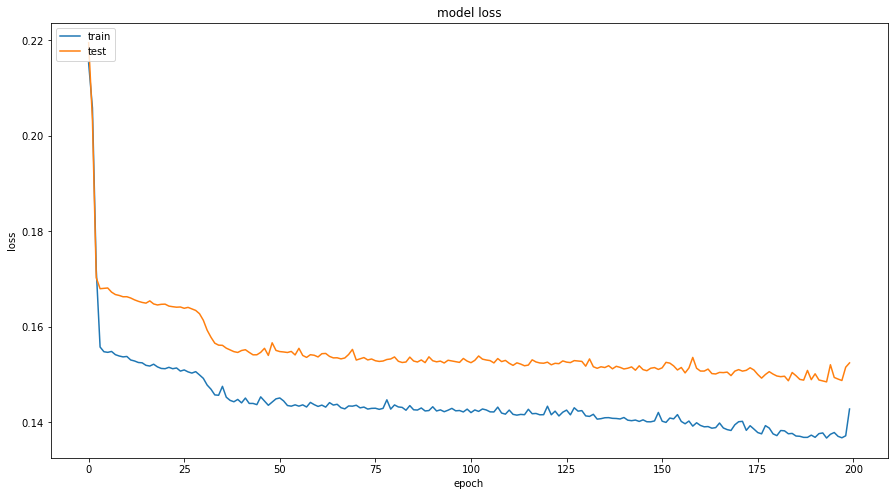

In [80]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()